# SECTION 0 — Setup
This notebook follows the **SEE → TREAT → VERIFY** funnel.

In this first version we only implement **SEE**:
- We **do not modify** the dataset.
- We only **observe structure, patterns, gaps, and anomalies**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the data

url =  "https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments.csv"
df = pd.read_csv(url)
df.head(5)

,Shipment_ID,Week,Warehouse_ID,Store_ID,Carrier,Product_Category,Weight_kg,Delivery_Time_hrs,Fuel_Price_EUR_per_litre,Temperature_C,Promo_Flag,On_Time_Flag,Weekly_Sales_EUR,Notes
0,SH00000,2024-02-18,C,S07,C3,Frozen,19.06,29.3,1.67,2.7,0,1,64724.47,NaN
1,SH00001,2024-05-19,B,S05,C3,Grocery,10.35,30.4,1.61,2.5,0,1,61723.79,NaN
2,SH00002,2024-04-14,C,S07,C1,Clothing,14.93,34.7,1.63,NaN,1,1,54098.40,Partial delivery
3,SH00003,2024-03-17,B,S03,C3,Electronics,11.06,29.8,1.76,NaN,0,0,60609.65,Damaged carton
4,SH00004,2024-02-25,C,S12,C1,Grocery,3.41,27.3,1.69,-0.7,0,0,55689.16,NaN


# 1.1 Dataset Shape & Structure
Check basic shape, column count, and schema consistency.


In [2]:
df.shape, df.columns


((1000, 14),
 Index(['Shipment_ID', 'Week', 'Warehouse_ID', 'Store_ID', 'Carrier',
        'Product_Category', 'Weight_kg', 'Delivery_Time_hrs',
        'Fuel_Price_EUR_per_litre', 'Temperature_C', 'Promo_Flag',
        'On_Time_Flag', 'Weekly_Sales_EUR', 'Notes'],
       dtype='object'))

# 1.2 Column-Level Integrity
Check if column names make operational sense.


In [3]:
df.columns.tolist()


['Shipment_ID',
 'Week',
 'Warehouse_ID',
 'Store_ID',
 'Carrier',
 'Product_Category',
 'Weight_kg',
 'Delivery_Time_hrs',
 'Fuel_Price_EUR_per_litre',
 'Temperature_C',
 'Promo_Flag',
 'On_Time_Flag',
 'Weekly_Sales_EUR',
 'Notes']

# 1.3 Data Type Inspection
Verify timestamps, numerics, categoricals.


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Shipment_ID               1000 non-null   object 
 1   Week                      1000 non-null   object 
 2   Warehouse_ID              1000 non-null   object 
 3   Store_ID                  1000 non-null   object 
 4   Carrier                   1000 non-null   object 
 5   Product_Category          1000 non-null   object 
 6   Weight_kg                 962 non-null    float64
 7   Delivery_Time_hrs         978 non-null    float64
 8   Fuel_Price_EUR_per_litre  950 non-null    float64
 9   Temperature_C             894 non-null    float64
 10  Promo_Flag                1000 non-null   int64  
 11  On_Time_Flag              1000 non-null   int64  
 12  Weekly_Sales_EUR          1000 non-null   float64
 13  Notes                     389 non-null    object 
dtypes: float6

# 1.4 Value-Level Inspection
Look for non-sensical values: negative delays, wrong modes, bad IDs.


In [5]:
df.describe(include='all')


,Shipment_ID,Week,Warehouse_ID,Store_ID,Carrier,Product_Category,Weight_kg,Delivery_Time_hrs,Fuel_Price_EUR_per_litre,Temperature_C,Promo_Flag,On_Time_Flag,Weekly_Sales_EUR,Notes
count,1000,1000,1000,1000,1000,1000,962.000000,978.000000,950.000000,894.000000,1000.00000,1000.00000,1000.000000,389
unique,1000,20,4,12,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,SH00000,2024-01-07,A,S05,C1,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partial delivery
freq,1,67,257,99,299,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156
mean,NaN,NaN,NaN,NaN,NaN,NaN,15.395468,27.746421,1.695432,4.905817,0.19200,0.16300,51863.602010,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5.804501,4.833491,0.103338,2.069712,0.39407,0.36955,14748.241346,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,11.600000,1.340000,-1.500000,0.00000,0.00000,4878.780000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,11.472500,24.600000,1.630000,3.600000,0.00000,0.00000,41786.897500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.175000,27.700000,1.695000,4.900000,0.00000,0.00000,51560.335000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,19.550000,30.875000,1.760000,6.300000,0.00000,0.00000,61935.445000,NaN


# 1.5 Numeric Distribution Scans
Look for skewness and unrealistic ranges in key numeric columns.


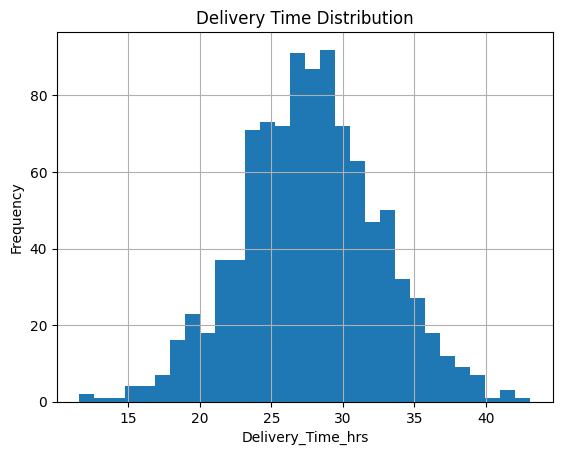

In [14]:
df['Delivery_Time_hrs'].hist(bins=30)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery_Time_hrs')
plt.ylabel('Frequency')
plt.show()


# 1.6 Category Frequencies
Check operational footprint by categorical distributions.


In [7]:
df['Carrier'].value_counts()


Carrier
C1    299
C2    254
C3    245
C4    202
Name: count, dtype: int64

# 1.7 Weekly Pattern Check
Shipments per Week to see basic temporal rhythm.


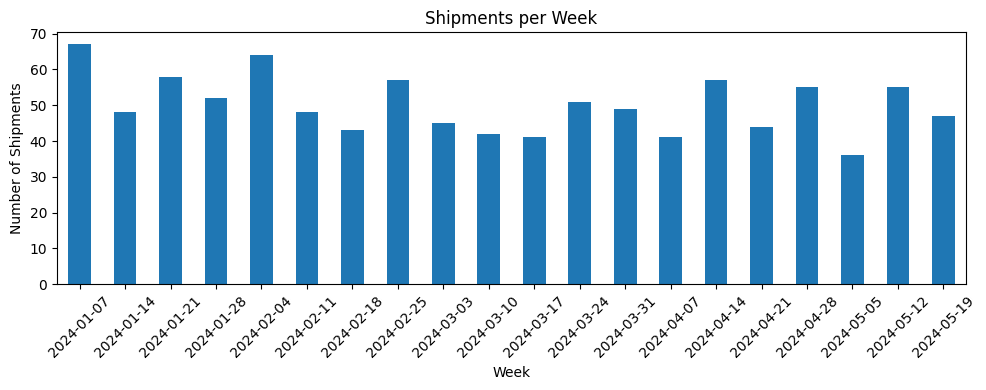

In [8]:
df.groupby('Week')['Shipment_ID'].count().plot(kind='bar', figsize=(10,4))
plt.title('Shipments per Week')
plt.xlabel('Week')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1.8 Missing Values Check
Quantify missingness before any treatment.


In [9]:
df.isna().sum()


Shipment_ID                   0
Week                          0
Warehouse_ID                  0
Store_ID                      0
Carrier                       0
Product_Category              0
Weight_kg                    38
Delivery_Time_hrs            22
Fuel_Price_EUR_per_litre     50
Temperature_C               106
Promo_Flag                    0
On_Time_Flag                  0
Weekly_Sales_EUR              0
Notes                       611
dtype: int64

In [10]:
(df.isna().mean() * 100).round(2)


Shipment_ID                  0.0
Week                         0.0
Warehouse_ID                 0.0
Store_ID                     0.0
Carrier                      0.0
Product_Category             0.0
Weight_kg                    3.8
Delivery_Time_hrs            2.2
Fuel_Price_EUR_per_litre     5.0
Temperature_C               10.6
Promo_Flag                   0.0
On_Time_Flag                 0.0
Weekly_Sales_EUR             0.0
Notes                       61.1
dtype: float64

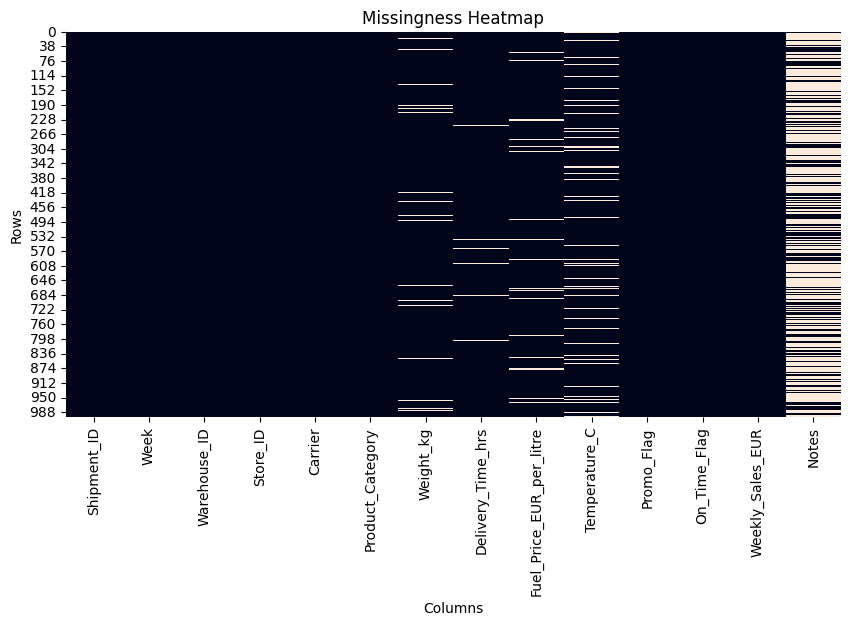

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title('Missingness Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


# 1.9 Relationship Scan
Correlation heatmap for numeric variables.


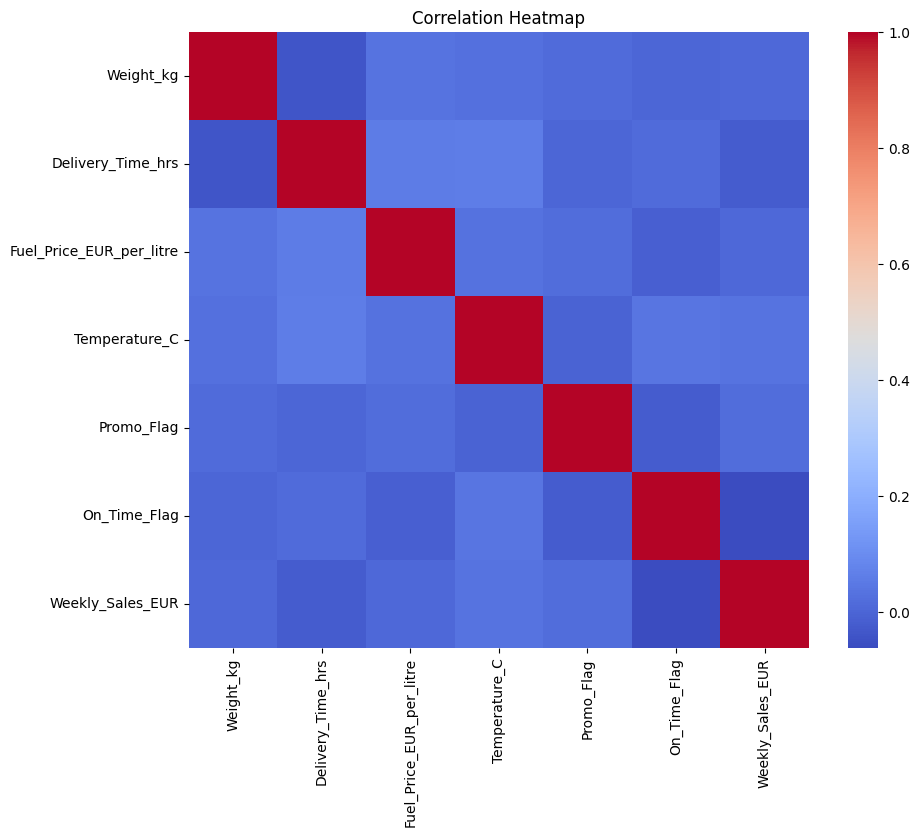

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
